In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = sns.load_dataset('iris')


In [3]:
# Check for missing values
print(data.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


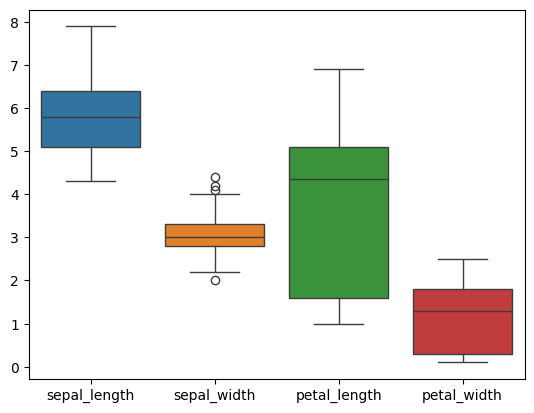

In [4]:
 #Box plot for outlier detection
sns.boxplot(data=data)
plt.show()

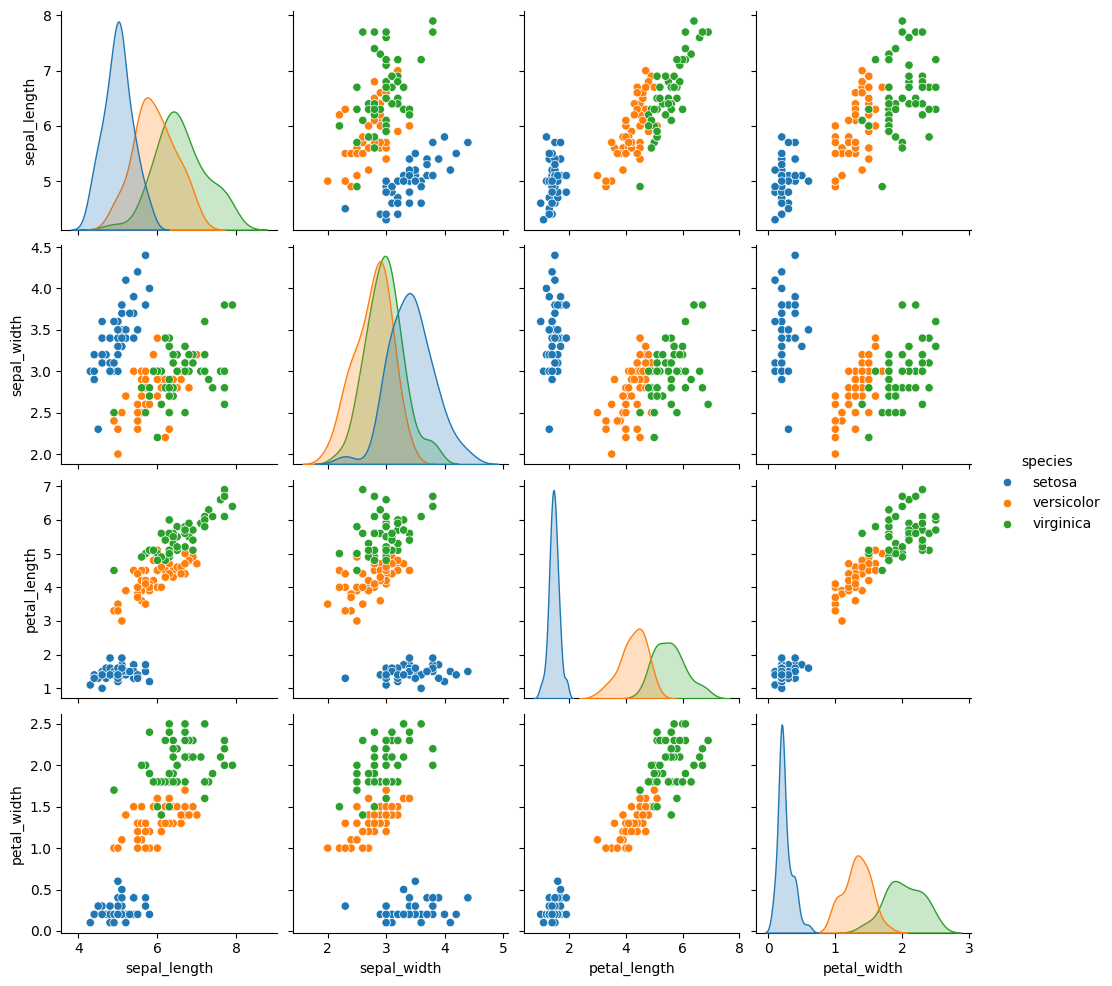

In [5]:
# Pair plot for feature relationships
sns.pairplot(data, hue='species')
plt.show()

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Prepare data
X = data.drop('species', axis=1)


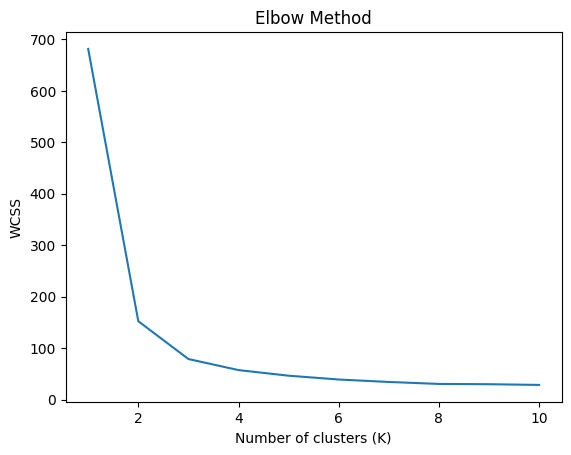

In [7]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

In [8]:
# Fit K-Means with optimal K
optimal_k = 3  # Assuming 3 from Elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['kmeans_cluster'] = kmeans.fit_predict(X)

In [9]:
# Evaluate clustering
silhouette_avg = silhouette_score(X, data['kmeans_cluster'])
print(f'Silhouette Score for K-Means: {silhouette_avg}')

Silhouette Score for K-Means: 0.5511916046195927


In [10]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


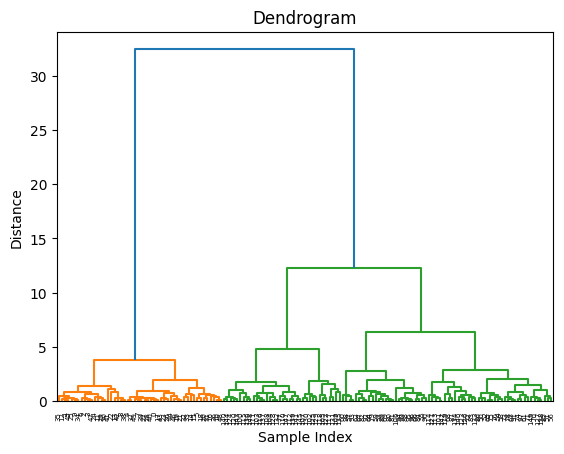

In [11]:
# Dendrogram
linked = linkage(X, 'ward')
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


In [12]:
# Fit Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k)
data['hierarchical_cluster'] = hierarchical.fit_predict(X)


In [13]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['dbscan_cluster'] = dbscan.fit_predict(X)

# Count clusters
print(data['dbscan_cluster'].value_counts())


dbscan_cluster
 1    84
 0    49
-1    17
Name: count, dtype: int64


In [16]:
# Analyze K-Means clusters
print(data.groupby('kmeans_cluster').agg(lambda x: x.mean() if x.dtype != 'object' else x.mode()[0])) # Use mode for non-numeric columns

# Analyze Hierarchical clusters
print(data.groupby('hierarchical_cluster').agg(lambda x: x.mean() if x.dtype != 'object' else x.mode()[0])) # Use mode for non-numeric columns

# Analyze DBSCAN clusters
print(data.groupby('dbscan_cluster').agg(lambda x: x.mean() if x.dtype != 'object' else x.mode()[0])) # Use mode for non-numeric columns

                sepal_length  sepal_width  petal_length  petal_width  \
kmeans_cluster                                                         
0                   6.853846     3.076923      5.715385     2.053846   
1                   5.006000     3.428000      1.462000     0.246000   
2                   5.883607     2.740984      4.388525     1.434426   

                   species  hierarchical_cluster  dbscan_cluster  
kmeans_cluster                                                    
0                virginica              1.846154        0.538462  
1                   setosa              1.000000       -0.020000  
2               versicolor              0.000000        0.770492  
                      sepal_length  sepal_width  petal_length  petal_width  \
hierarchical_cluster                                                         
0                         5.920312     2.751562      4.420312     1.434375   
1                         5.006000     3.428000      1.462000     0.24

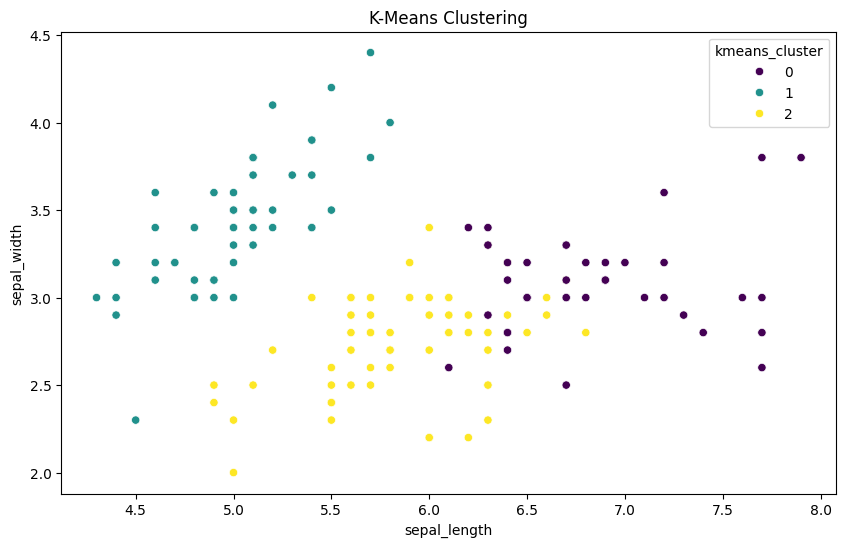

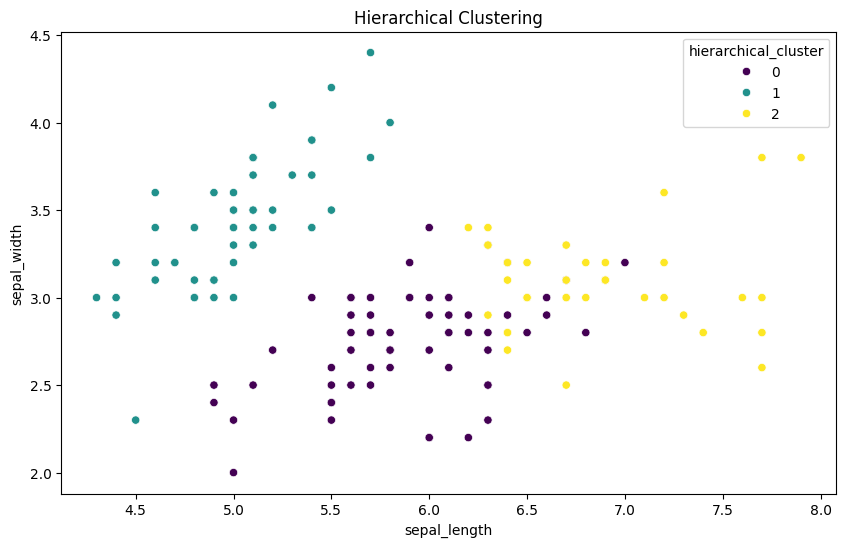

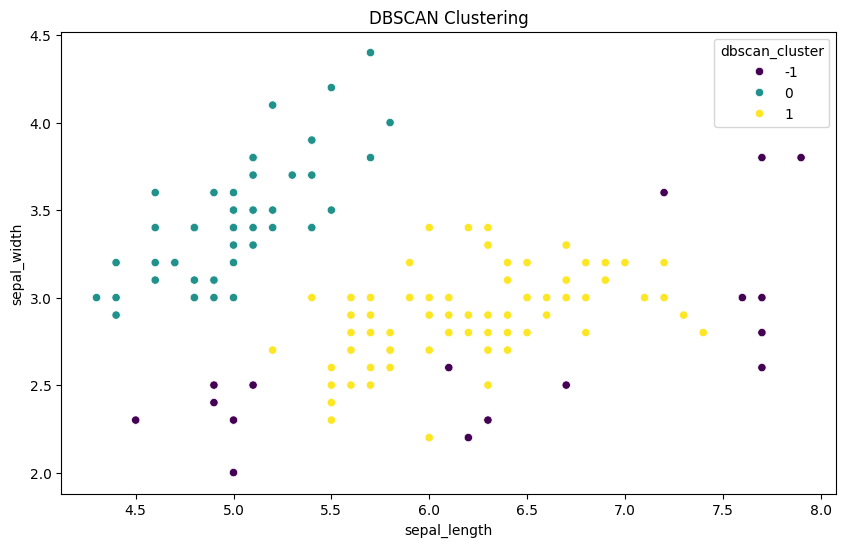

In [17]:
# K-Means Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='kmeans_cluster', data=data, palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Hierarchical Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='hierarchical_cluster', data=data, palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# DBSCAN Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='dbscan_cluster', data=data, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


In [18]:
# Silhouette Score for DBSCAN
dbscan_silhouette = silhouette_score(X, data['dbscan_cluster'])
print(f'Silhouette Score for DBSCAN: {dbscan_silhouette}')


Silhouette Score for DBSCAN: 0.4860341970345691
